In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
A = np.asarray([[10,0,0],
                [20,1,0],
                [30,0,1]])
A

array([[10,  0,  0],
       [20,  1,  0],
       [30,  0,  1]])

In [76]:
def generador(A):
    n = 100
    s1 = 0
    sk = s1
    serie = []
    serie.append(sk)
    while len(serie) < n:
        x = np.random.rand(3, 1)
        norm_x = np.linalg.norm(x, ord=2)
        if norm_x > 1 or norm_x == 0:
            # genero otro x
            continue

        normA = np.linalg.norm(A @ x, ord=2) / norm_x
        sk = max(sk, normA)
        serie.append(sk)

    return serie

serie = generador(A)

In [77]:
serie[-1]

37.20290061145297

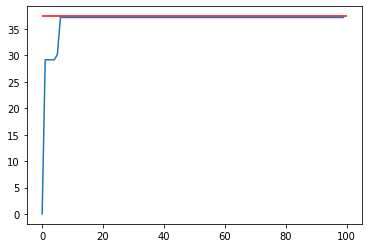

In [78]:
plt.plot(serie)
plt.hlines(y=np.linalg.norm(A, ord=2), xmin=0, xmax=100, color='r')
plt.show()

In [82]:
# Ejercicio 19
A = np.asarray([[3, 0, 0],
                [0, 5/4, 3/4],
                [0, 3/4, 5/4]])
A

array([[3.  , 0.  , 0.  ],
       [0.  , 1.25, 0.75],
       [0.  , 0.75, 1.25]])

In [83]:
b = np.array([[3,2,2]]).T
b

array([[3],
       [2],
       [2]])

In [84]:
x = np.array([[1,1,1]]).T
x

array([[1],
       [1],
       [1]])

In [85]:
np.linalg.solve(A, b)

array([[1.],
       [1.],
       [1.]])

In [86]:
b + 1e-5

array([[3.00001],
       [2.00001],
       [2.00001]])

In [87]:
np.linalg.solve(A, b + 1e-5)

array([[1.00000333],
       [1.000005  ],
       [1.000005  ]])

In [90]:
difs = []
be = np.sqrt(17) * 1/6 * 10**(-4) # Error relativo calculado
while len(difs) < 1000_000:
    error = np.random.rand(3, 1)
    error_norm = np.linalg.norm(error)
    if error_norm >= 1 or error_norm == 0:
        continue
    # Escalo el error que será menor estricto a 1e-5
    error = error * be

    b_tilde = b + error

    x_tilde = np.linalg.solve(A, b_tilde)

    difs.append(np.linalg.norm(x_tilde - x))

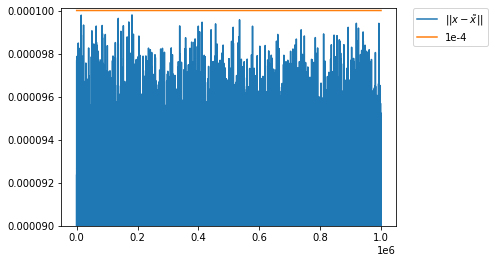

In [103]:
# plot difs array with y axis in between (1 and 2)
plt.plot(difs, label=r'$||x - \tilde x||$')
plt.ylim(0.9e-4, 1.001e-4)
plt.plot([1e-4] * len(difs), label='1e-4')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()